### Prieskumná Analýza

In [1]:
import numpy as np 
import pandas as pd 
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [3]:
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})

df['Country'] = df['Country'].replace('Mainland China', 'China')

df['Active_cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

df.head()

SNo        Date Province/State Country      Last Update  Confirmed  Deaths  \
0    1  01/22/2020          Anhui   China  1/22/2020 17:00        1.0     0.0   
1    2  01/22/2020        Beijing   China  1/22/2020 17:00       14.0     0.0   
2    3  01/22/2020      Chongqing   China  1/22/2020 17:00        6.0     0.0   
3    4  01/22/2020         Fujian   China  1/22/2020 17:00        1.0     0.0   
4    5  01/22/2020          Gansu   China  1/22/2020 17:00        0.0     0.0   

   Recovered  Active_cases  
0        0.0           1.0  
1        0.0          14.0  
2        0.0           6.0  
3        0.0           1.0  
4        0.0           0.0

In [4]:
# Get last update
last_cases_update = df[df['Date'] == max(df['Date'])].reset_index()
data = last_cases_update.groupby(['Date']).sum().reset_index()
number_of_cases = data[['Confirmed','Recovered', 'Deaths', 'Active_cases', 'Date']]
number_of_cases 

Confirmed   Recovered     Deaths  Active_cases        Date
0  67073728.0  43103827.0  1536056.0    22433845.0  12/06/2020

In [5]:
df_cases_per_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_cases_per_countries = df_cases_per_countries.drop_duplicates(subset = ['SNo'])
df_cases_per_countries = df_cases_per_countries.drop_duplicates(subset = ['Country'])
df_cases_per_countries = df_cases_per_countries[df_cases_per_countries['Confirmed']!=0]
df_cases_per_countries



Country        Date      SNo  Confirmed    Deaths  \
21627              Hungary  12/06/2020   171789   250278.0    5868.0   
22222                India  12/06/2020  6370326  9677203.0  140573.0   
27295              Lebanon  12/06/2020   171806   137112.0    1099.0   
1658   Antigua and Barbuda  12/06/2020   171726      144.0       4.0   
4199              Barbados  12/06/2020   171734      285.0       7.0   
...                    ...         ...      ...        ...       ...   
51150         Vatican City  03/09/2020     4507        1.0       0.0   
45215           St. Martin  03/09/2020     4412        2.0       0.0   
38987  Republic of Ireland  03/08/2020     4067       21.0       0.0   
0               Azerbaijan  02/28/2020     2664        1.0       0.0   
35550        North Ireland  02/28/2020     2685        1.0       0.0   

       Recovered  Active_cases  
21627    71682.0      172728.0  
22222  9139901.0      396729.0  
27295    90229.0       45784.0  
1658       133.0           7.0  
4199       260.0          18.0  
...          ...           ...  
51150        0.0           1.0  
45215        0.0           2.0  
38987        0.0          21.0  
0            0.0           1.0  
35550        0.0           1.0  

[217 rows x 7 columns]

In [6]:
df2 = df.groupby("Date").sum().reset_index().sort_values(by=['Date'], ascending=False).head(100)
df2 = df2.sort_values(by=['Date'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(220    08/29/2020
  221    08/30/2020
  222    08/31/2020
  223    09/01/2020
  224    09/02/2020
            ...    
  315    12/02/2020
  316    12/03/2020
  317    12/04/2020
  318    12/05/2020
  319    12/06/2020
  Name: Date, Length: 100, dtype: object, 0, ''),
  Text(220    08/29/2020
  221    08/30/2020
  222    08/31/2020
  223    09/01/2020
  224    09/02/2020
            ...    
  315    

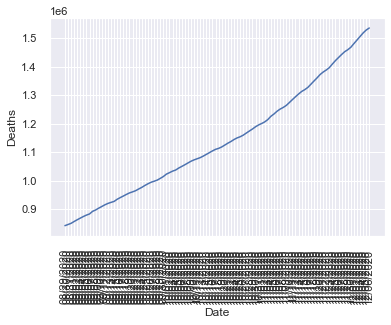

In [7]:

sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x=df2['Date'], y=df2['Deaths'])

import matplotlib.pyplot as plt
# control x and y limits
plt.xticks(x=df2['Date'], rotation='vertical')

C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

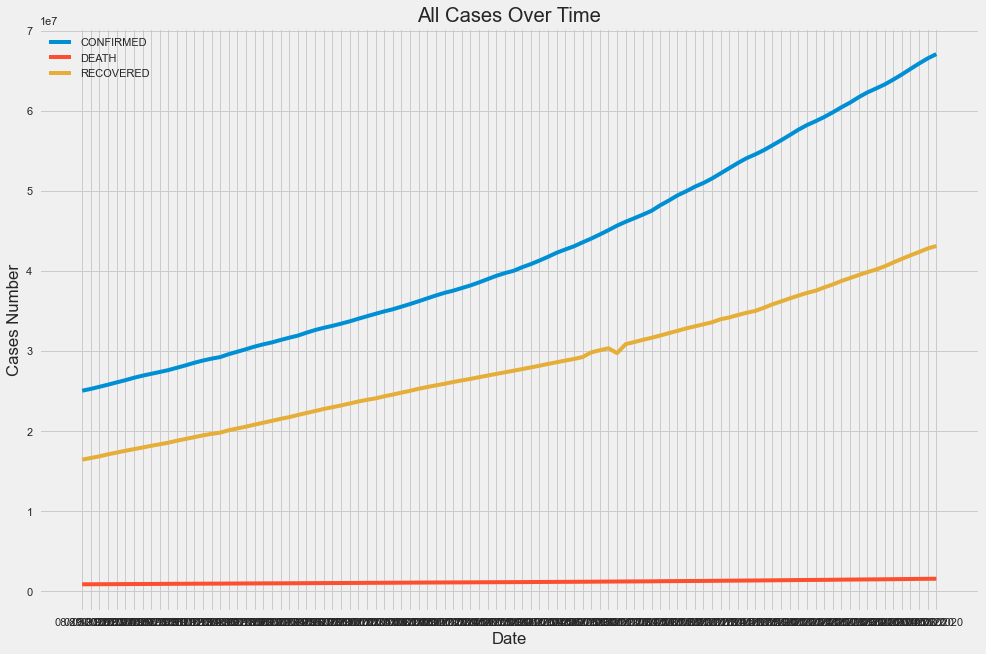

In [8]:
sns.set()
#%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15, 10))
sns.lineplot(df2['Date'], df2['Confirmed'].tolist(), label = 'CONFIRMED')
sns.lineplot(df2['Date'], df2['Deaths'].tolist(), label = 'DEATH')
sns.lineplot(df2['Date'], df2['Recovered'].tolist(), label = 'RECOVERED')

plt.xlabel('Date'); plt.ylabel('Cases Number'); plt.title('All Cases Over Time')
plt.legend();

In [9]:
## https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5 ##

df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]

# Create visualization
fig = go.Figure(data=go.Choropleth(
    locations = df_cases_per_countries['Country'],
    locationmode = 'country names',
    z = df_cases_per_countries['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [10]:
fig = go.Figure(data=go.Choropleth(
    locations = df_cases_per_countries['Country'],
    locationmode = 'country names',
    z = df_cases_per_countries['Recovered'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Recovered Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [11]:
fig = go.Figure(data=go.Choropleth(
    locations = df_cases_per_countries['Country'],
    locationmode = 'country names',
    z = df_cases_per_countries['Deaths'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Dead Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

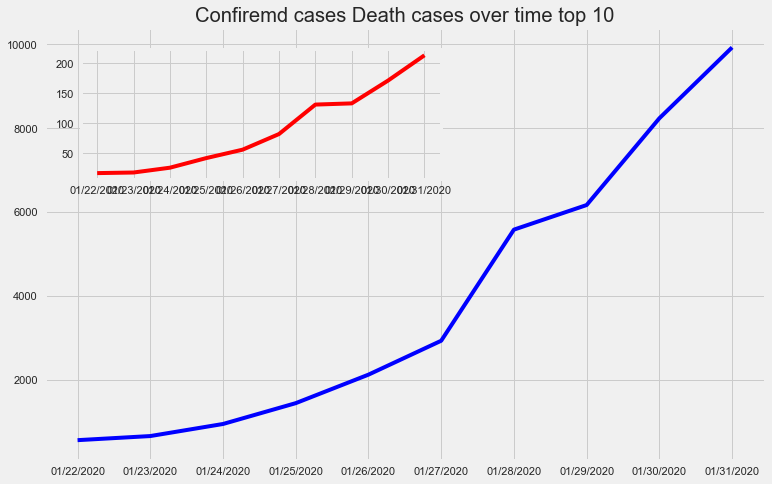

In [12]:
df1 = df.groupby('Date').sum().reset_index().head(10)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.05,0.65,0.5,0.3])

ax1.set_title("Confiremd cases Death cases over time top 10")

ax1.plot(df1['Date'],
        df1['Confirmed'],
        color='blue')

ax2.plot(df1['Date'],
        df1['Deaths'],
        color='red')

### Linear Regression model and EDA

In [13]:
df_confirmed = pd.read_csv('./Data/time_series_covid_19_confirmed.csv')
df_confirmed.head()


Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/27/20  11/28/20  11/29/20  \
0        0        0        0        0  ...     45723     45844     46116   
1        0        0        0        0  ...     36245     36790     37625   
2        0        0        0        0  ...     80168     81212     82221   
3        0        0        0        0  ...      6610      6610      6712   
4        0        0        0        0  ...     15008     15087     15103   

   11/30/20  12/1/20  12/2/20  12/3/20  12/4/20  12/5/20  12/6/20  
0     46274    46516    46718    46837    46837    47072    47306  
1     38182    39014    39719    40501    41302    42148    42988  
2     83199    84152    85084    85927    86730    87502    88252  
3      6745     6790     6842     6904     6955     7005     7050  
4     15139    15251    15319    15361    15493    15536    15591  

[5 rows x 324 columns]

In [14]:
df_deaths = pd.read_csv('./Data/time_series_covid_19_deaths.csv')
df_deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/27/20  11/28/20  11/29/20  \
0        0        0        0        0  ...      1740      1752      1774   
1        0        0        0        0  ...       771       787       798   
2        0        0        0        0  ...      2372      2393      2410   
3        0        0        0        0  ...        76        76        76   
4        0        0        0        0  ...       342       345       346   

   11/30/20  12/1/20  12/2/20  12/3/20  12/4/20  12/5/20  12/6/20  
0      1795     1822     1841     1846     1846     1864     1874  
1       810      822      839      852      870      889      905  
2      2431     2447     2464     2480     2492     2501     2516  
3        76       76       76       77       77       78       78  
4       348      350      351      352      353      354      354  

[5 rows x 324 columns]

In [15]:
df_recovered = pd.read_csv('./Data/time_series_covid_19_recovered.csv')
df_recovered.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/27/20  11/28/20  11/29/20  \
0        0        0        0        0  ...     36295     36709     36716   
1        0        0        0        0  ...     17755     18152     18481   
2        0        0        0        0  ...     51946     52568     53204   
3        0        0        0        0  ...      5710      5710      5794   
4        0        0        0        0  ...      7697      7763      7763   

   11/30/20  12/1/20  12/2/20  12/3/20  12/4/20  12/5/20  12/6/20  
0     36831    36946    37218    37260    37260    37393    37685  
1     18849    19384    19912    20484    20974    21286    21617  
2     53809    54405    54990    55538    56079    56617    57146  
3      5873     5940     5988     6066     6130     6171     6238  
4      7851     7932     8139     8244     8299     8335     8338  

[5 rows x 324 columns]

In [16]:
df_confirmed_dates = df_confirmed.iloc[:, 4:-1]
df_deaths_dates = df_deaths.iloc[:, 4:-1]
df_recovered_dates = df_recovered.iloc[:, 4:-1]

In [17]:
dates = df_confirmed_dates.keys()
total_confirmed_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for date in dates:
    confirmed_sum = df_confirmed_dates[date].sum()
    death_sum = df_deaths_dates[date].sum()
    recovered_sum = df_recovered_dates[date].sum()
    total_confirmed_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [18]:
print(f' Total Confirmed Cases: {confirmed_sum}, Total Deaths Cases: {death_sum}, Total Recovered Cases: {recovered_sum}')

 Total Confirmed Cases: 66540034, Total Deaths Cases: 1528868, Total Recovered Cases: 42789879


In [19]:
# reshaping the lists
total_confirmed_cases_np = np.array(total_confirmed_cases).reshape(-1,1)
total_deaths_np = np.array(total_deaths).reshape(-1,1)
total_recovered_np = np.array(total_recovered).reshape(-1,1)
dates_list_np = np.array([date for date in range(len(dates))]).reshape(-1,1)


In [20]:
forcast_of_next_month_np = np.array([date for date in range(len(dates)+ 30)]).reshape(-1,1)
forcast_of_next_month_np

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [21]:
# forcasting for the next month
forcast_of_next_month_dates = []
for col in range(len(forcast_of_next_month_np)):
    forcast_of_next_month_dates.append((datetime.datetime.strptime('2020-01-22', '%Y-%m-%d') + datetime.timedelta(days=col)).strftime('%Y-%m-%d'))
forcast_of_next_month_dates

['2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-

In [22]:
List_of_countries = list(df_confirmed['Country/Region'].unique())
List_of_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [23]:

# total_confirmed_cases_per_country 
y = df_confirmed.groupby("Country/Region").sum().reset_index()
total_confirmed_cases_per_country = y.iloc[:,[0] + [-1]]
total_confirmed_cases_per_country = total_confirmed_cases_per_country.rename(columns={"Country/Region":"Country","12/6/20":"Cases"})
total_confirmed_cases_per_country['Country'].replace('Mainland China', 'China')
total_confirmed_cases_per_country


Country  Cases
0           Afghanistan  47306
1               Albania  42988
2               Algeria  88252
3               Andorra   7050
4                Angola  15591
..                  ...    ...
186  West Bank and Gaza  98038
187      Western Sahara     10
188               Yemen   2337
189              Zambia  17916
190            Zimbabwe  10718

[191 rows x 2 columns]

In [24]:
fig = go.Figure(data=go.Choropleth(
    locations = total_confirmed_cases_per_country['Country'],
    locationmode = 'country names',
    z = total_confirmed_cases_per_country['Cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [25]:
# total_recovered_cases_per_country
y1 = df_recovered.groupby("Country/Region").sum().reset_index()
total_recovered_cases_per_country = y1.iloc[:,[0] + [-1]]
total_recovered_cases_per_country = total_recovered_cases_per_country.rename(columns={"Country/Region":"Country","12/6/20":"Cases"})
total_recovered_cases_per_country['Country'].replace('Mainland China', 'China')
total_recovered_cases_per_country

Country  Cases
0           Afghanistan  37685
1               Albania  21617
2               Algeria  57146
3               Andorra   6238
4                Angola   8338
..                  ...    ...
186  West Bank and Gaza  72773
187      Western Sahara      8
188               Yemen   1549
189              Zambia  17173
190            Zimbabwe   8880

[191 rows x 2 columns]

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations = total_recovered_cases_per_country['Country'],
    locationmode = 'country names',
    z = total_recovered_cases_per_country['Cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Recoverrd Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [27]:
# total_deaths_cases_per_country
y2 = df_deaths.groupby("Country/Region").sum().reset_index()
total_deaths_cases_per_country = y2.iloc[:,[0] + [-1]]
total_deaths_cases_per_country = total_deaths_cases_per_country.rename(columns={"Country/Region":"Country","12/6/20":"Cases"})
total_deaths_cases_per_country['Country'].replace('Mainland China', 'China')
total_deaths_cases_per_country

Country  Cases
0           Afghanistan   1874
1               Albania    905
2               Algeria   2516
3               Andorra     78
4                Angola    354
..                  ...    ...
186  West Bank and Gaza    828
187      Western Sahara      1
188               Yemen    639
189              Zambia    364
190            Zimbabwe    291

[191 rows x 2 columns]

In [28]:
fig = go.Figure(data=go.Choropleth(
    locations = total_deaths_cases_per_country['Country'],
    locationmode = 'country names',
    z = total_deaths_cases_per_country['Cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Deaths Cases',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

### Linear Regression Model and SVM

In [29]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(dates_list_np, total_confirmed_cases_np, test_size =0.20, random_state = 0)
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(dates_list_np, total_recovered_np, test_size =0.20, random_state = 0)

In [30]:
# builld and train the model for comfiremed cases
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True, fit_intercept=True)
model.fit(X_train_confirmed, y_train_confirmed)
test_pred = model.predict(X_test_confirmed)
pred = model.predict(forcast_of_next_month_np)
print('Mean Absolute Error: ', mean_absolute_error(test_pred, y_test_confirmed))
print('Mean Squared Error: ', mean_squared_error(test_pred, y_test_confirmed))

Mean Absolute Error:  5283737.800880613
Mean Squared Error:  43124017301419.91


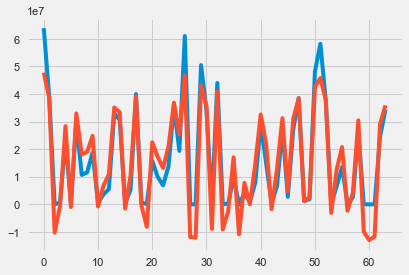

In [31]:
plt.plot(y_test_confirmed)
plt.plot(test_pred)

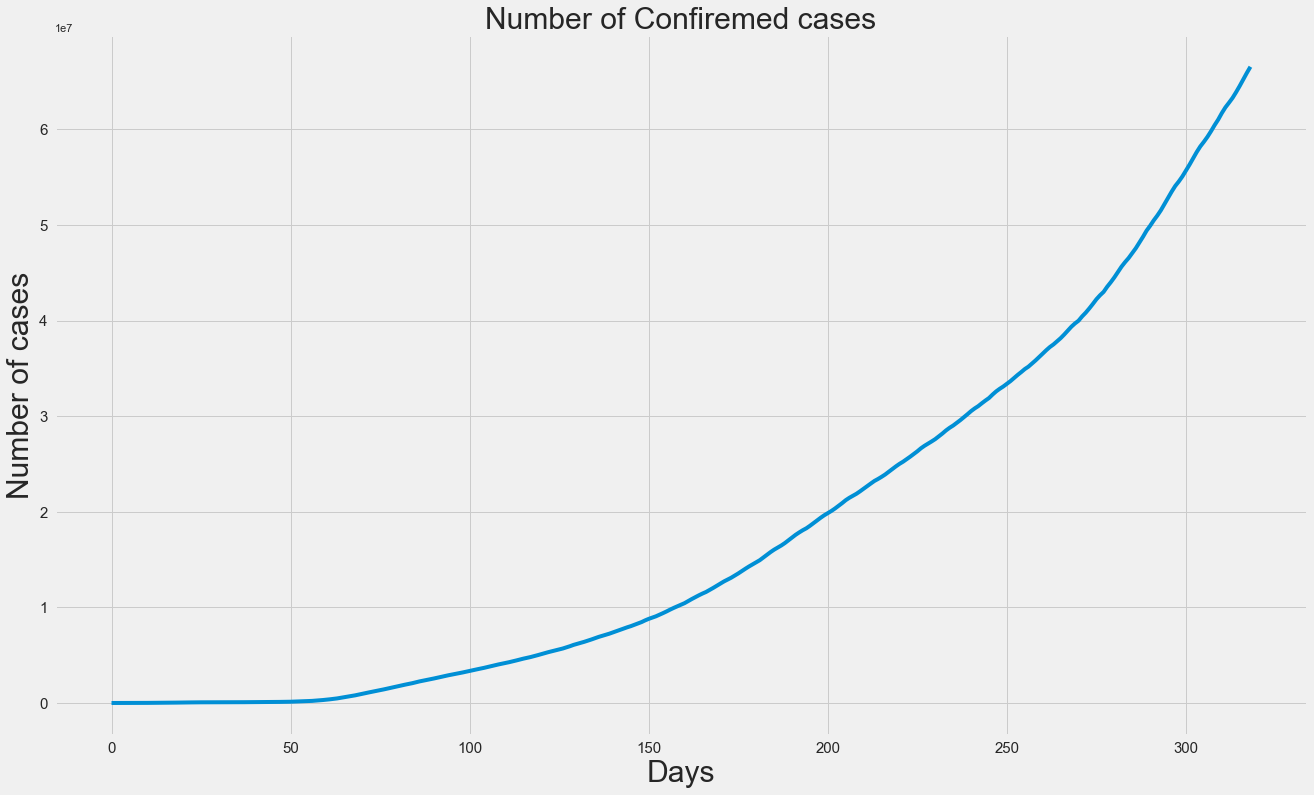

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(dates_list_np, total_confirmed_cases)
plt.title('Number of Confiremed cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

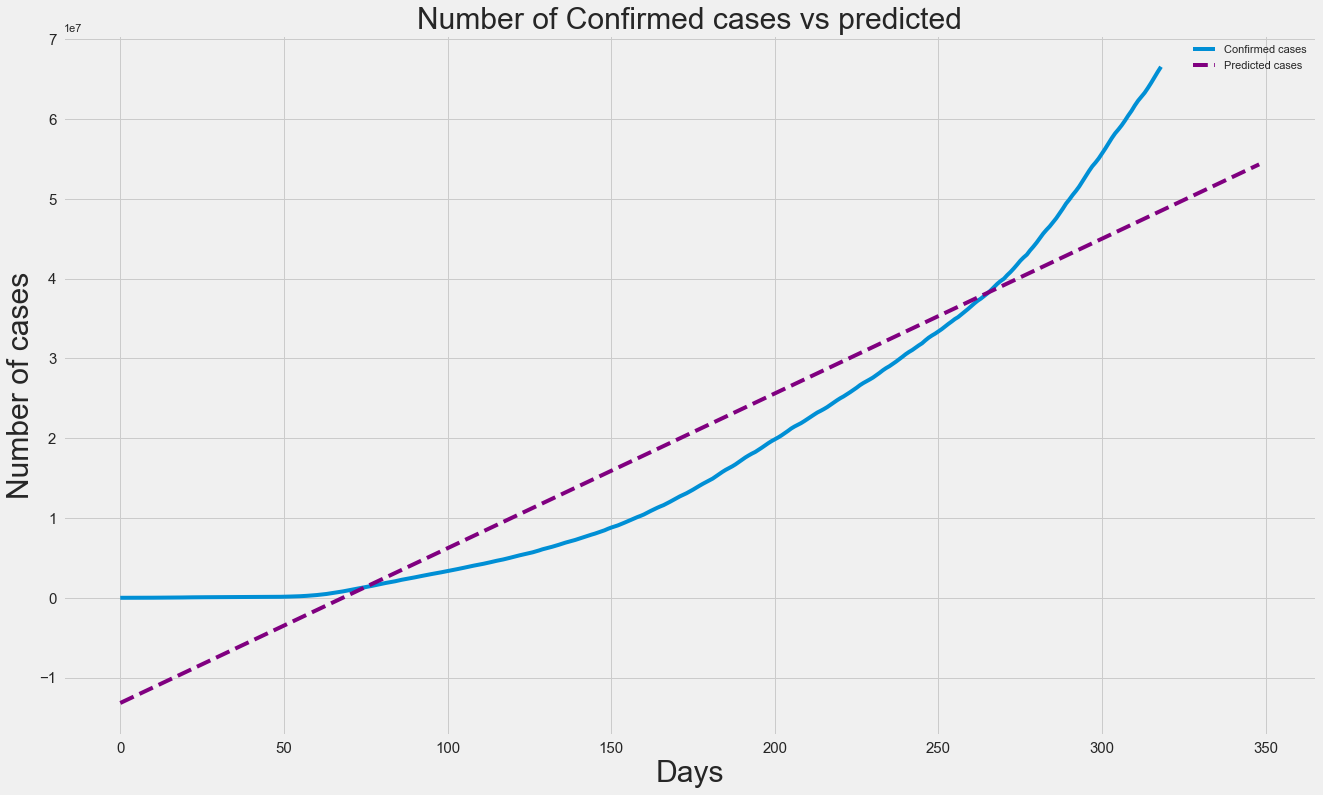

In [33]:
plt.figure(figsize=(20, 12))
plt.plot(dates_list_np, total_confirmed_cases)
plt.plot(forcast_of_next_month_np, pred, linestyle='dashed', color='purple')
plt.title('Number of Confirmed cases vs predicted', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['Confirmed cases', 'Predicted cases'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [35]:
# buidling model for recoverd cases
model_1 = LinearRegression(normalize=True, fit_intercept=True)
model_1.fit(X_train_recovered, y_train_recovered)
test_pred_recovery = model_1.predict(X_test_recovered)
pred_recovery = model_1.predict(forcast_of_next_month_np)
print('Mean Absolute Error: ', mean_absolute_error(test_pred_recovery, y_test_recovered))
print('Mean Squared Error: ', mean_squared_error(test_pred_recovery, y_test_recovered))

Mean Absolute Error:  3898648.963431181
Mean Squared Error:  22191476660272.973


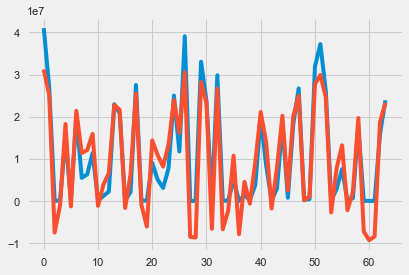

In [36]:
plt.plot(y_test_recovered)
plt.plot(test_pred_recovery)

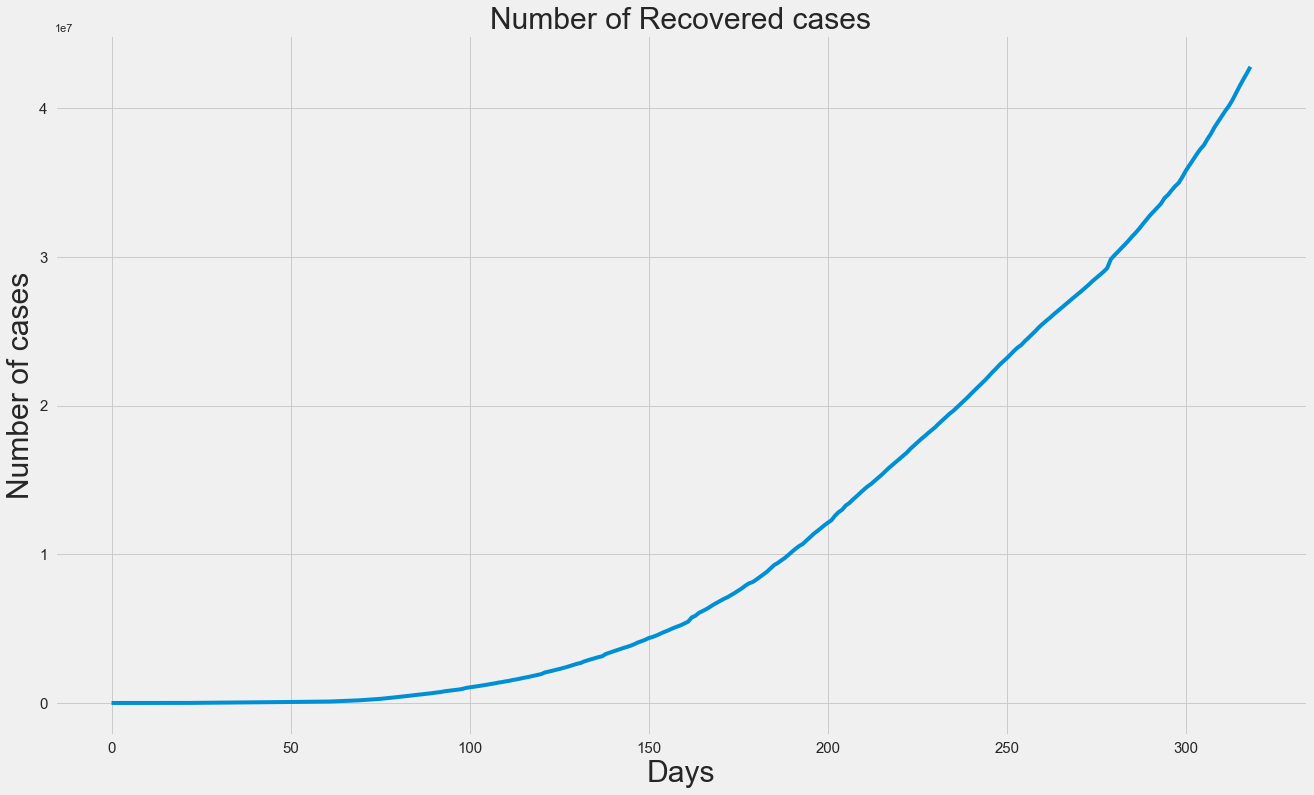

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(dates_list_np, total_recovered)
plt.title('Number of Recovered cases', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Number of cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

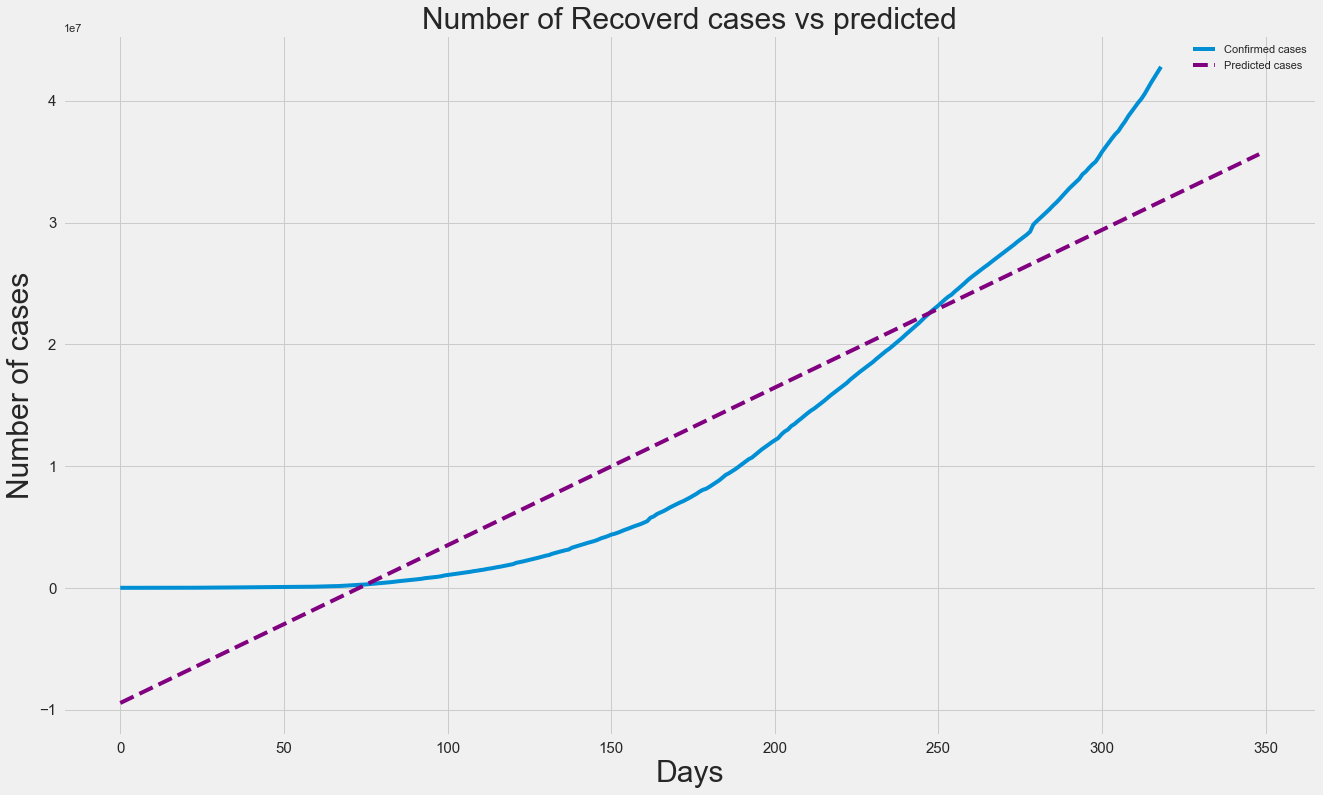

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(dates_list_np, total_recovered)
plt.plot(forcast_of_next_month_np, pred_recovery, linestyle='dashed', color='purple')
plt.title('Number of Recoverd cases vs predicted', size=30)
plt.xlabel('Days', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['Confirmed cases', 'Predicted cases'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [39]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(forcast_of_next_month_np)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
# here i am calculating MAE and MSE
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

MAE: 1069116.850855857
MSE: 1520941048127.0635


C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



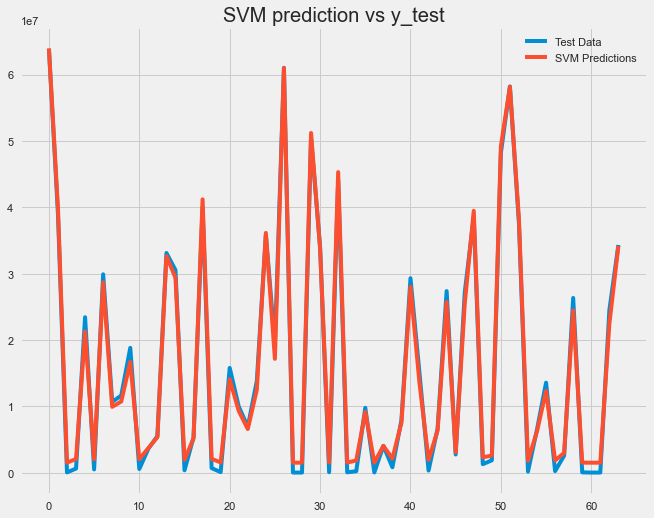

In [41]:
# Plotting prediction vs y_test graph
plt.figure(figsize=(10, 8))
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.title("SVM prediction vs y_test")
plt.legend(['Test Data', 'SVM Predictions'])

In [44]:
# transforming our data for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_x_train = poly.fit_transform(X_train_confirmed)
poly_x_test = poly.fit_transform(X_test_confirmed)
poly_future_forcasting = poly.fit_transform(forcast_of_next_month_np)
# transforming our data for bayesian polynomial regression
bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_x_train = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_x_test = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcasting = bayesian_poly.fit_transform(forcast_of_next_month_np)

In [45]:
# building Linear Regression model
classifier = LinearRegression(normalize=True, fit_intercept=False)
classifier.fit(poly_x_train, y_train_confirmed)
test_classifier_pred = classifier.predict(poly_x_test)
classifier_pred = classifier.predict(poly_future_forcasting)
print('MAE:', mean_absolute_error(test_classifier_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_classifier_pred, y_test_confirmed))
print(classifier.coef_)

MAE: 312690.58233335795
MSE: 133155003130.6487
[[-4.47331267e+05  4.75546231e+04 -1.30257890e+03  1.71964381e+01
  -6.52598246e-02  9.17550060e-05]]


Text(0.5, 1.0, 'Test Data vs Polynomial Regression Predictions')

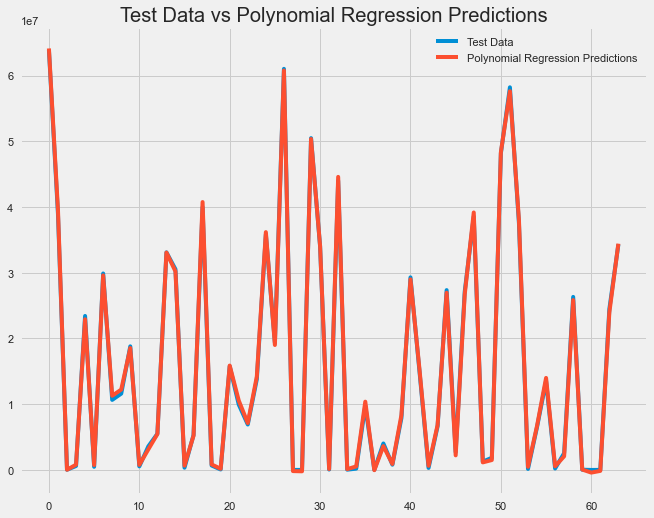

In [47]:
# Plotting test data vs polynomila regression prediction
plt.figure(figsize=(10, 8))
plt.plot(y_test_confirmed)
plt.plot(test_classifier_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.title('Test Data vs Polynomial Regression Predictions')

In [52]:
# calculating moving increase
def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

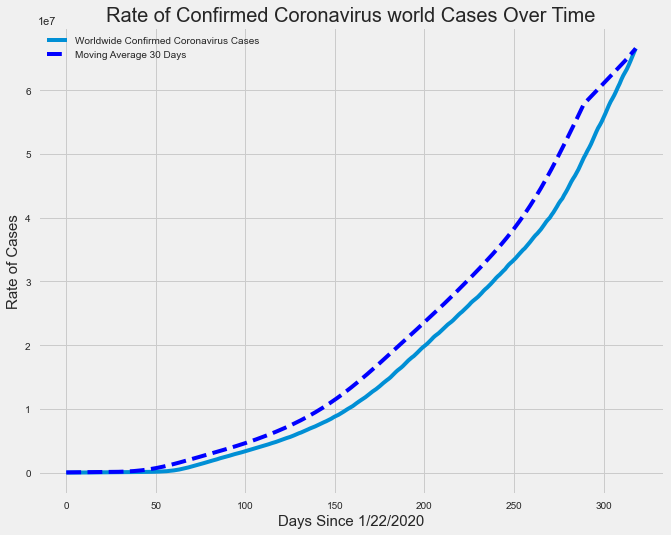

In [49]:
# visualizing rate of confirmed cases world wide vs moving average
adjusted_dates = forcast_of_next_month_np[:-10]
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
adjusted_dates_1 = adjusted_dates[0:319]
world_confirmed_avg = moving_average(total_confirmed_cases, 30)
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates_1, total_confirmed_cases)
plt.plot(adjusted_dates_1, world_confirmed_avg, linestyle='dashed', color='blue')
plt.title('Rate of Confirmed Coronavirus world Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide Confirmed Coronavirus Cases', 'Moving Average 30 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

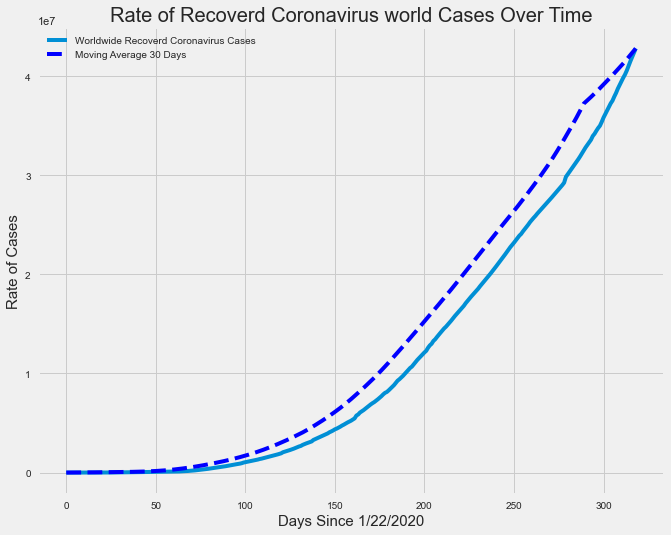

In [50]:
# visualizing rate of recoverd cases world wide vs moving average
adjusted_dates = forcast_of_next_month_np[:-10]
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
adjusted_dates_1 = adjusted_dates[0:319]
world_recovered_avg = moving_average(total_recovered, 30)
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates_1, total_recovered)
plt.plot(adjusted_dates_1, world_recovered_avg, linestyle='dashed', color='blue')
plt.title('Rate of Recoverd Coronavirus world Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide Recoverd Coronavirus Cases', 'Moving Average 30 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

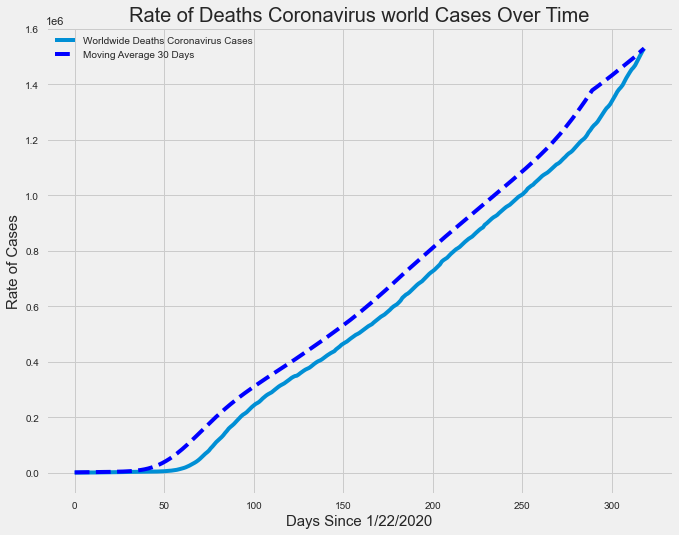

In [51]:
# visualizing rate of deaths cases world wide vs moving average
adjusted_dates = forcast_of_next_month_np[:-10]
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
adjusted_dates_1 = adjusted_dates[0:319]
world_deaths_avg = moving_average(total_deaths, 30)
plt.figure(figsize=(10, 8))
plt.plot(adjusted_dates_1, total_deaths)
plt.plot(adjusted_dates_1, world_deaths_avg, linestyle='dashed', color='blue')
plt.title('Rate of Deaths Coronavirus world Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Rate of Cases', size=15)
plt.legend(['Worldwide Deaths Coronavirus Cases', 'Moving Average 30 Days'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()